# The Traveling Salesman Problem

## Introduction

The Traveling Salesman Problem is a very well known problem of Computer Science.

Now let's assume a salesman wants to make a round-trip around the capitals of the 48 states of the US (excluding Alaska and Hawaii):


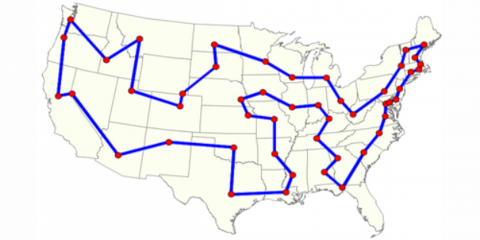

Source: https://cdn.journals.aps.org/journals/PHYSICS/synopses/images/10.1103/PhysRevA.95.032323
last accessed: April 24 2024

We want to find a solution that minimizes the costs for the roundtrip. 

A possible solution is described by a sequence of all 48 capitals. 

The **Traveling Salesman algorithm** is straight forward:

1. Make a list of all possible solutions, each described as a sequence of the 48 capitals.
2. Remove the first element of the list and name it $s$. Calculate the costs  $c_s$ for the roundtrip $s$.
3. As long as there are elements in the list:
    1. Remove the first element of the list and name it $s_\text{cand}$. Calculate its costs $c_{s_\text{cand}}$.
    2. If $c_{s_\text{cand}} < c_s$, set $c_s$ to $c_{s_\text{cand}}$ and $s$ to $s_{cand}$.
4. Output $s$ as (one of) the optimal solution(s) and $c_s$ as its costs. 

The list created in step 1 consists of all possible sequences of the 48 capitals, i.e. it has $48!$ elements. 


**Note:** The traveling salesman problem is often named as an *NP-complete* problem. Solutions to NP problems are easily verifiable. This is not the case, when a minimum solution is required, as a minimum must be compared to all other values to verify whether it is indeed a minimum value. The traveling salesman problem is in NP, if the condition is to find a solution with costs $\leq c$. In this case a solution is validated easily by simply calculating its costs. 
Finding a solution may still require to test all potential solutions if only the solution last tested fulfills the condition. Proving that no solution can exist equally requires testing all potential solutions. With this definition the Traveling Salesman is equally NP-complete.

## Complexity of the Algorithm



To deal with the large and small numbers we use the `decimal` package:

In [ ]:
from decimal import *

Above algorithms tests and compares $48!$ potential solutions.  We calculate the number of possible solutions with these numbers:

In [ ]:
def factorials(n):
    f=Decimal(1)
    for i in range(1,n+1):
        f*=i
    return f

possibilities=factorials(48)

And output the number of potential solutions with a `, as thousands sparator.

In [ ]:
print(f"{int(possibilities):,d}")

This number is inimaginably large. To understand the implication of this large number, we assume that each possibility can be tested very fast and calculate how long the testing of all possibilities will take.

We thus assume that the cost for one possibilty can be computed and compared with the actual minimum value (steps A and B in above algorithm) in the **shortest possible time**.

The shortest event ever measured was reported on Oct 2020: a photon’s journey through a hydrogen molecule which takes 247 zeptoseconds, i.e. $247 \cdot 10^{-21}$s (https://www.sciencenews.org/article/photon-journey-molecule-shortest-event-zeptosecond-physics).

We define thus a variable for the smallest time span ever measured:

In [ ]:
smallestTimeSpan=Decimal(247e-21)

In [ ]:
print(smallestTimeSpan)

As we can see the time is not stored 100% exactly due to the encoding of numbers. But we are sufficiently close.

Now we can determine the time it takes to test **all** $48!$ possibilities when each test is performed that fast. We have this a **lower bound for the runtime** of our algorithm:

In [ ]:
lowerBoundForRuntimeInSec=smallestTimeSpan*possibilities

In [ ]:
print(lowerBoundForRuntimeInSec)

or

In [ ]:
print(f"{int(lowerBoundForRuntimeInSec):,d}")

But what does this time mean? In order to understand this value we need to relate it to something we know. 

The oldest thing we can use as a reference is our universe. A recent research estimates its age to 26.7 billion years ( https://phys.org/news/2023-07-age-universe-billion-years-previously.html, July 13 2023).

In [ ]:
ageOfUniverseInYears=Decimal(26.7e9)

In [ ]:
# output with , as separator for 1000th
print(f"{int(ageOfUniverseInYears):,d}")

In [ ]:
daysPerYear=365.2422
numberOfSecondsInYear=daysPerYear*24*60*60

We need now to translate this time in seconds.

"The tropical year is the period of time required by the sun to pass from vernal equinox to vernal equinox. It  is equal to 365 days, 5 hours, 48 minutes, and 46 seconds, or 365.2422 days. The tropical year is used to keep track 
of seasons, planting, and harvesting. Let's try to develop a calendar with an integral number of days per calendar  year that will keep track of the tropical year and not get out of step with the seasons over time.

We begin with a calendar of 365 days per year. Our calendar year is shorter than the tropical year by 0.2422 days. So to correct (approximately), we add 1 day every four years (leap year). Thus, three calendar years are 365 days long; the fourth calendar year is 366 days long. The average length of the calendar year in days now becomes: (3 x 365 + 366)/4 = 365.25 days."

https://www.grc.nasa.gov/www/k-12/Numbers/Math/Mathematical_Thinking/calendar_calculations.htm

In [ ]:
ageOfUniverseInSeconds=ageOfUniverseInYears*Decimal(numberOfSecondsInYear)

Now we calculate the ratio of the runtime of the algorithm and the age of the universe.

In [ ]:
factorPossibilitiesAgeUniverse=lowerBoundForRuntimeInSec/ageOfUniverseInSeconds

And let's print this:

In [ ]:
print(f"We would need {float(factorPossibilitiesAgeUniverse):,f} times the age of the universe to run the program.")

**Summary:**

Even if we tested every single of the $48!$ possibilities for the Traveling Salesman roundtrip in the shortest time ever measured, the age of the universe would by far not be sufficient to run our algorithm.

**Conclusion:** It is theoretically possible to solve our Traveling Salesman task, but practically the problem can't be solved: it is **computational intactable**.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This notebook was created by Christina B. Class for teaching at EAH Jena and is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.